<a href="https://colab.research.google.com/github/dipansh-girdhar/Projects-Assignments---Data-Science-Analytics/blob/master/Sales_Data_Time_Series_Analysis/Sales_Data_Time_Series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import re
import warnings
import itertools
import statsmodels.api as sm
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [0]:
# !pip install -U -q PyDrive
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials
# # Authenticate and create the PyDrive client.
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
path1 = '/content/drive/My Drive/Datasets&Questions_v4/date.xlsx'
df_date= pd.read_excel(path1)
path2='/content/drive/My Drive/Datasets&Questions_v4/sales_data.xlsx'
df_sales=pd.read_excel(path2)

In [0]:
df_sales.head()

,transaction id,product id,product description,quantity sold,transaction timestamp,unit price,customer id,transaction country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [0]:
df_sales.shape

(541909, 8)

In [0]:
df_date.shape

(541909, 6)

In [0]:
df_date.head()

,timestamp,date,day_name,day_of_month,month_of_year,time_of_day(hh:mm:ss)
0,2010-12-01 08:26:00,2010-12-01,Wednesday,1,December,08:26:00
1,2010-12-01 08:26:00,2010-12-01,Wednesday,1,December,08:26:00
2,2010-12-01 08:26:00,2010-12-01,Wednesday,1,December,08:26:00
3,2010-12-01 08:26:00,2010-12-01,Wednesday,1,December,08:26:00
4,2010-12-01 08:26:00,2010-12-01,Wednesday,1,December,08:26:00


In [0]:
colnames=['transaction_id','product_id','product_description', 'quantity_sold', 'transaction_timestamp', 'unit_price', 'customer_id', 'customer_country']

In [0]:
df_sales.columns=colnames

In [0]:
df_sales.head()

,transaction_id,product_id,product_description,quantity_sold,transaction_timestamp,unit_price,customer_id,customer_country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [0]:
df_sales['transaction_timestamp'].min() , df_sales['transaction_timestamp'].max()

(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-12-09 12:50:00'))

In [0]:
df_sales.isnull().sum()

transaction_id                0
product_id                    0
product_description        1454
quantity_sold                 0
transaction_timestamp         0
unit_price                    0
customer_id              135080
customer_country              0
dtype: int64

In [0]:
df_date.columns=['timestamp', 'date', 'day_name', 'day_of_month',
       'month_of_year', 'time_of_day']

In [0]:
df_merge=pd.concat([df_sales, df_date], axis=1, ignore_index=True)

In [0]:
df_merge.shape

(541909, 14)

In [0]:
df_merge.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01,Wednesday,1,December,08:26:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01,Wednesday,1,December,08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01,Wednesday,1,December,08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01,Wednesday,1,December,08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01,Wednesday,1,December,08:26:00


In [0]:
df_merge.columns=['transaction_id','product_id','product_description', 'quantity_sold', 'transaction_timestamp', 'unit_price', 'customer_id', 'customer_country', 'timestamp', 'date', 'day_name', 'day_of_month',
       'month_of_year', 'time_of_day']

In [0]:
df_merge['value']=df_merge.quantity_sold*df_merge.unit_price

In [0]:
df_merge.head()

,transaction_id,product_id,product_description,quantity_sold,transaction_timestamp,unit_price,customer_id,customer_country,timestamp,date,day_name,day_of_month,month_of_year,time_of_day,value
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01,Wednesday,1,December,08:26:00,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01,Wednesday,1,December,08:26:00,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01,Wednesday,1,December,08:26:00,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01,Wednesday,1,December,08:26:00,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,2010-12-01,Wednesday,1,December,08:26:00,20.34


In [0]:
quantity_eachday = df_merge.groupby('date')['quantity_sold'].sum().reset_index()

In [0]:
quantity_eachday

,date,quantity_sold
0,2010-12-01,26814
1,2010-12-02,21023
2,2010-12-03,14830
3,2010-12-05,16395
4,2010-12-06,21419
5,2010-12-07,24995
6,2010-12-08,22741
7,2010-12-09,18431
8,2010-12-10,20297
9,2010-12-12,10565


In [0]:
quantity_eachday = quantity_eachday.set_index('date')

In [0]:
mean_value=quantity_eachday['quantity_sold'].resample('MS').mean()


In [0]:
mean_value['2011':]

date
2011-01-01    12873.583333
2011-02-01    11582.875000
2011-03-01    13032.296296
2011-04-01    13766.571429
2011-05-01    15215.640000
2011-06-01    13139.346154
2011-07-01    15042.923077
2011-08-01    15623.038462
2011-09-01    21146.807692
2011-10-01    21943.538462
2011-11-01    28472.538462
2011-12-01    28291.625000
Freq: MS, Name: quantity_sold, dtype: float64

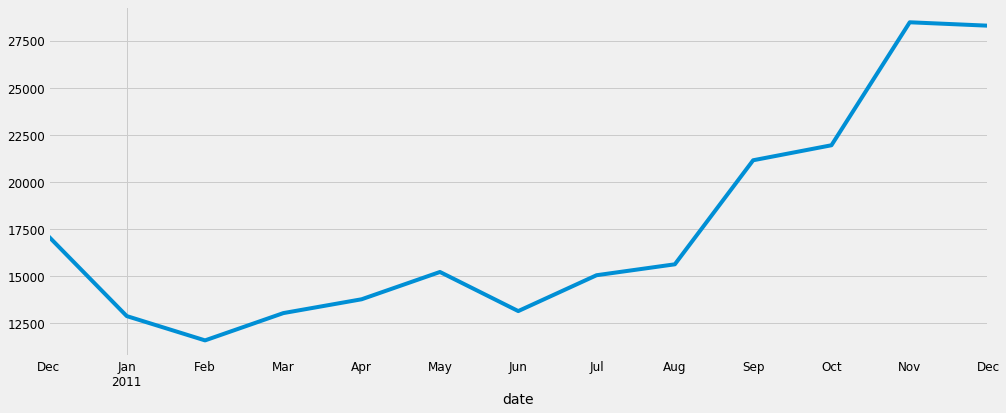

In [0]:
mean_value.plot(figsize=(15, 6))
plt.show()

**We can interpret that the companies perfformance has been improving over time where the rise in sales increased almost linearly after June.**


**The quantity of units sold in December would have been the most out of all the months but still it shows a descent from November only because the data we have is available only till first week of December 2011**

In [0]:
revenue_eachday=df_merge.groupby('date')['value'].sum().reset_index()

In [0]:
revenue_eachday = revenue_eachday.set_index('date')
mean_revenue=revenue_eachday['value'].resample('MS').mean()


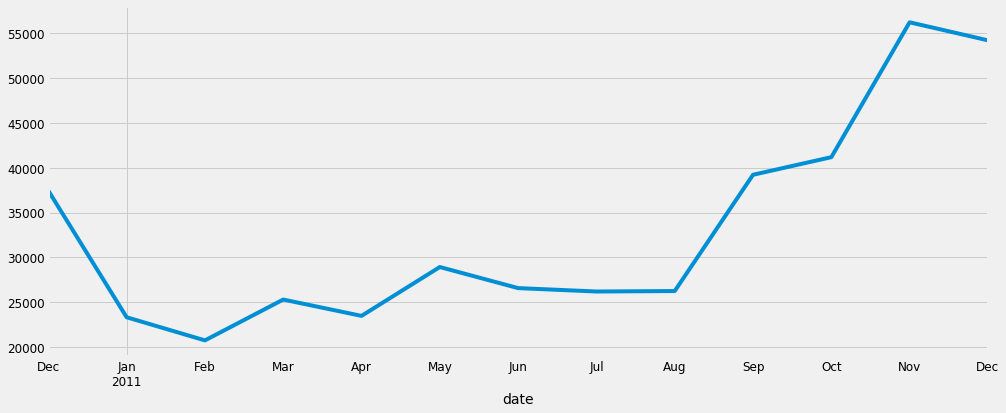

In [0]:
mean_revenue.plot(figsize=(15, 6))
plt.show()

##ARIMA(Autoregressive Integrated Moving Average) time series forecasting

In [0]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [0]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

In [0]:
mod = sm.tsa.statespace.SARIMAX(quantity_eachday,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0107      0.101     -0.107      0.915      -0.208       0.186
ma.L1         -0.9857      0.021    -46.185      0.000      -1.027      -0.944
ar.S.L12      -0.4600      0.074     -6.228      0.000      -0.605      -0.315
sigma2      1.166e+08    1.4e-10    8.3e+17      0.000    1.17e+08    1.17e+08


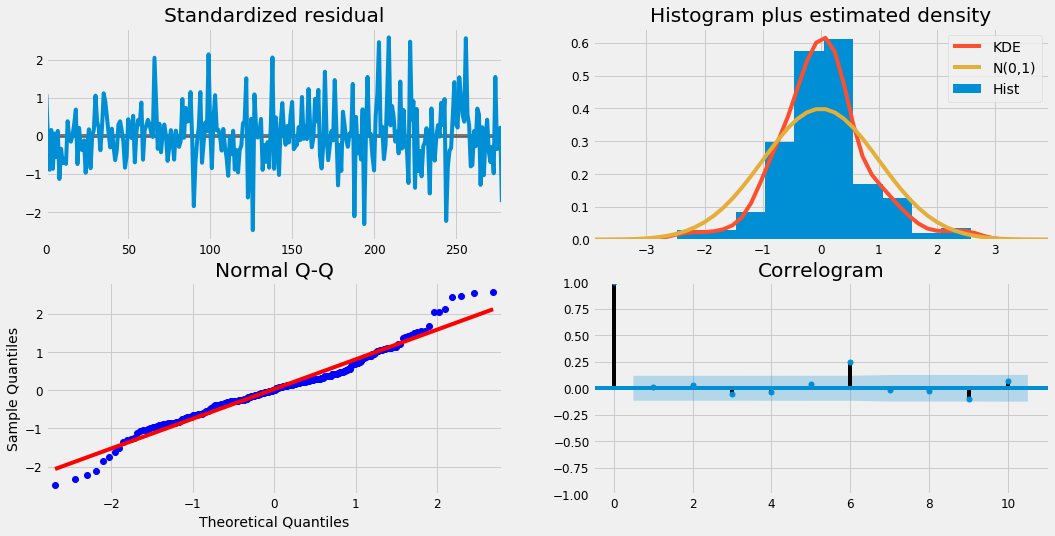

In [0]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [0]:
products=df_merge.groupby('product_id')['quantity_sold'].sum().reset_index()

In [0]:
df_sales['quantity_sold']=df_sales['quantity_sold'].abs()

In [0]:
products=df_merge.groupby('product_id')['quantity_sold'].sum().reset_index()

In [0]:
products.sort_values('quantity_sold',ascending=False)

,product_id,quantity_sold
1070,22197,56450
2622,84077,53847
3659,85099B,47363
3670,85123A,38830
2735,84879,36221
377,21212,36039
1905,23084,30646
1335,22492,26437
1453,22616,26315
889,21977,24753


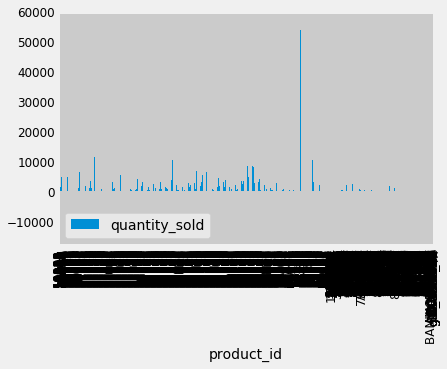

In [0]:
products.plot(x='product_id', y='quantity_sold', kind='bar') 
plt.show()

## Customer Analysis

In [0]:
customer_country=df_sales[['customer_country','customer_id']].drop_duplicates()
customer_country.groupby(['customer_country'])['customer_id'].aggregate('count').reset_index().sort_values('customer_id', ascending=False)

,customer_country,customer_id
36,United Kingdom,3950
14,Germany,95
13,France,87
31,Spain,31
3,Belgium,25
33,Switzerland,21
27,Portugal,19
19,Italy,15
12,Finland,12
1,Austria,11


As more than 90% data is from United kingdom, we'll restrict to that only for our research

In [0]:
df_merge = df_merge.loc[df_sales['customer_country'] == 'United Kingdom']

In [0]:
df_merge.quantity_sold.min()

-80995

In [0]:
df_merge = df_merge[(df_merge['quantity_sold']>0)]

In [0]:
def unique_counts(df1):
   for i in df1.columns:
       count = df1[i].nunique()
       print(i, ": ", count)
unique_counts(df_merge)

transaction_id :  18786
product_id :  3936
product_description :  4058
quantity_sold :  387
transaction_timestamp :  17361
unit_price :  1248
customer_id :  3921
customer_country :  1
timestamp :  17361
date :  305
day_name :  6
day_of_month :  31
month_of_year :  12
time_of_day :  736
value :  4759


In [0]:
import datetime as dt
NOW = dt.datetime(2011,12,10)

In [0]:
df_sales['transaction_timestamp'] = pd.to_datetime(df_sales['transaction_timestamp'])

### RFM Customer Segmentation

In [0]:
rfmTable = df_merge.groupby('customer_id').agg({'transaction_timestamp': lambda x: (NOW - x.max()).days, 'transaction_id': lambda x: len(x), 'value': lambda x: x.sum()})
rfmTable['transaction_timestamp'] = rfmTable['transaction_timestamp'].astype(int)
rfmTable.rename(columns={'transaction_timestamp': 'recency', 
                         'transaction_id': 'frequency', 
                         'value': 'monetary_value'}, inplace=True)

In [0]:
rfmTable.head()

,recency,frequency,monetary_value
customer_id,,,
12346.0,325,1,77183.60
12747.0,2,103,4196.01
12748.0,0,4596,33719.73
12749.0,3,199,4090.88
12820.0,3,59,942.34


In [0]:
df_merge[df_merge.customer_id==12346.0]

,transaction_id,product_id,product_description,quantity_sold,transaction_timestamp,unit_price,customer_id,customer_country,timestamp,date,day_name,day_of_month,month_of_year,time_of_day,value
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,2011-01-18 10:01:00,2011-01-18,Tuesday,18,January,10:01:00,77183.6


The first customer has shopped only once, bought one product at a huge quantity(74,215). The unit price is very low; perhaps a clearance sale.

###Split the metrics

In [0]:
quantiles=rfmTable.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [0]:
quantiles

{'frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 99.0},
 'monetary_value': {0.25: 300.03999999999996,
  0.5: 651.8199999999999,
  0.75: 1575.89},
 'recency': {0.25: 17.0, 0.5: 50.0, 0.75: 142.0}}

In [0]:
segmented_rfm = rfmTable

In [0]:
segmented_rfm.head()

,recency,frequency,monetary_value
customer_id,,,
12346.0,325,1,77183.60
12747.0,2,103,4196.01
12748.0,0,4596,33719.73
12749.0,3,199,4090.88
12820.0,3,59,942.34


**frequency represents the number of repeat purchases the customer has made. This means that it’s one less than the total number of purchases.**


**recency represents the age of the customer when they made their most recent purchases. This is equal to the duration between a customer’s first purchase and their latest purchase. (Thus if they have made only 1 purchase, the recency is 0.)**

In [0]:
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [0]:
segmented_rfm['r_quartile'] = segmented_rfm['recency'].apply(RScore, args=('recency',quantiles,))
segmented_rfm['f_quartile'] = segmented_rfm['frequency'].apply(FMScore, args=('frequency',quantiles,))
segmented_rfm['m_quartile'] = segmented_rfm['monetary_value'].apply(FMScore, args=('monetary_value',quantiles,))
segmented_rfm.head()

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile
customer_id,,,,,,
12346.0,325,1,77183.60,4,4,1
12747.0,2,103,4196.01,1,1,1
12748.0,0,4596,33719.73,1,1,1
12749.0,3,199,4090.88,1,1,1
12820.0,3,59,942.34,1,2,2


RFM segments split the customer base into an imaginary 3D cube which is hard to visualize.

In [0]:
segmented_rfm['RFMScore'] = segmented_rfm.r_quartile.map(str) + segmented_rfm.f_quartile.map(str) + segmented_rfm.m_quartile.map(str)
segmented_rfm.head()

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFMScore
customer_id,,,,,,,
12346.0,325,1,77183.60,4,4,1,441
12747.0,2,103,4196.01,1,1,1,111
12748.0,0,4596,33719.73,1,1,1,111
12749.0,3,199,4090.88,1,1,1,111
12820.0,3,59,942.34,1,2,2,122


It is obvious that the first customer is not our best customer at all.

In [0]:
segmented_rfm[segmented_rfm['RFMScore']=='111'].sort_values('monetary_value', ascending=False).head(10)

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFMScore
customer_id,,,,,,,
18102.0,0,431,259657.30,1,1,1,111
17450.0,8,337,194550.79,1,1,1,111
17511.0,2,963,91062.38,1,1,1,111
16684.0,4,277,66653.56,1,1,1,111
14096.0,4,5111,65164.79,1,1,1,111
13694.0,3,568,65039.62,1,1,1,111
15311.0,0,2379,60767.90,1,1,1,111
13089.0,2,1818,58825.83,1,1,1,111
15769.0,7,130,56252.72,1,1,1,111


In [0]:

import seaborn as sns
sns.set_palette("husl")
sns.set(rc={'image.cmap': 'coolwarm'})
%matplotlib inline